# Aufgabe 1 (2P)
Laden Sie den Datensatz „rawdata_luftqualitaet.csv“ in einen DataFrame. Skalieren Sie die Daten mit dem StandardScaler. Trennen Sie die
Daten in einen Lern- und Testdatensatz zur Classification des Labels "state_air_quality" mit den 3 Klassen 0, 1 und 2. Nutzen Sie alle 5
Merkmale 'humidity_inside','temperature_inside','co2_inside','temperature_heater‘ und 'temperature_wall_inside‘ im Training.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

from keras.models import Sequential
from keras.layers import Dense, Activation

In [104]:
df1 = pd.read_csv('rawdata_luftqualitaet.csv')

X = df1.drop('state_air_quality', axis=1)
y = df1[['state_air_quality']].values

print("Attributes:", X.shape, "Results:", y.shape)

# should this be shuffled or not?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale input
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Attributes: (916, 5) Results: (916, 1)
X_train: (732, 5)
y_train: (732, 1)
X_test: (184, 5)
y_test: (184, 1)


## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen. (1P)

<img src="images/1a.png" width="600">

In [ ]:
model = Sequential([
    Dense(60, input_shape=(5,), activation='relu'), # gives max(0, x) (returns given value unless it is negative)
    Dense(60, activation='relu'), # gives max(0, x)
    Dense(3, activation='softmax'), # gives probabilities (non linear)
])
# sparse_categorical_crossentropy: wiedly used for multi-classification, designed to be used with integer targets
# rmsprop: Root Mean Square Propagation
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess mit „Overfitting“ ähnlich wie unten in der
Abbildung (1P)

<img src="images/1b.png" width="600">

In [106]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=50, verbose=2)

Epoch 1/200
15/15 - 1s - 38ms/step - accuracy: 0.7104 - loss: 0.8402 - val_accuracy: 0.8478 - val_loss: 0.6112
Epoch 2/200
15/15 - 0s - 5ms/step - accuracy: 0.8060 - loss: 0.5656 - val_accuracy: 0.8533 - val_loss: 0.4637
Epoch 3/200
15/15 - 0s - 5ms/step - accuracy: 0.8265 - loss: 0.4523 - val_accuracy: 0.8913 - val_loss: 0.3816
Epoch 4/200
15/15 - 0s - 5ms/step - accuracy: 0.8839 - loss: 0.3795 - val_accuracy: 0.8967 - val_loss: 0.3244
Epoch 5/200
15/15 - 0s - 5ms/step - accuracy: 0.9016 - loss: 0.3239 - val_accuracy: 0.9022 - val_loss: 0.2765
Epoch 6/200
15/15 - 0s - 5ms/step - accuracy: 0.9112 - loss: 0.2790 - val_accuracy: 0.9076 - val_loss: 0.2368
Epoch 7/200
15/15 - 0s - 5ms/step - accuracy: 0.9194 - loss: 0.2456 - val_accuracy: 0.9130 - val_loss: 0.2072
Epoch 8/200
15/15 - 0s - 5ms/step - accuracy: 0.9139 - loss: 0.2175 - val_accuracy: 0.9130 - val_loss: 0.1839
Epoch 9/200
15/15 - 0s - 5ms/step - accuracy: 0.9276 - loss: 0.1961 - val_accuracy: 0.9293 - val_loss: 0.1622
Epoch 10/

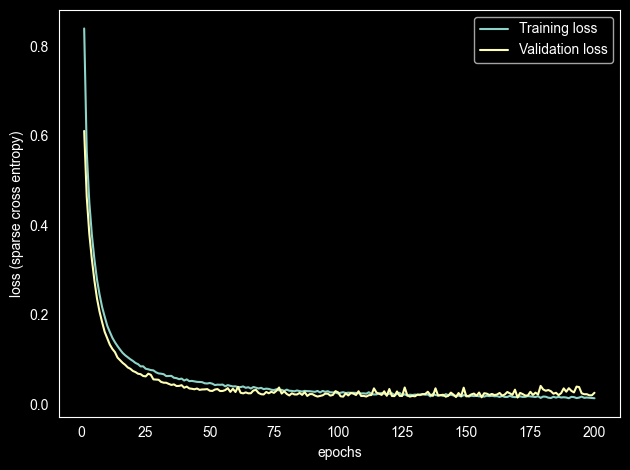

In [107]:
loss_mse = history.history['loss']
val_loss_mse = history.history['val_loss']
plt.ylabel('loss (sparse cross entropy)')
plt.xlabel('epochs')
plt.plot(range(1, len(loss_mse)+1), loss_mse)
plt.plot(range(1, len(val_loss_mse)+1), val_loss_mse)
plt.grid(False)
plt.legend(['Training loss', 'Validation loss'])
plt.tight_layout()

---
# Aufgabe 2 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Fügen Sie dieses Mal
Callbacks für ein EarlyStopping ein. (1P)

In [108]:
model = Sequential([
    Dense(60, input_shape=(5,), activation='relu'),
    Dense(60, activation='relu'),
    Dense(3, activation='softmax'),
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

C:\Users\aaron\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen sowie den definierten Callbacks und visualisieren Sie den Anlernprozess erneut,
ähnlich wie unten, je nach nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die
callbacks zu vermeiden. (1P)

<img src="images/2b.png" width="600">

In [109]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=50, verbose=2, callbacks=early_stop)

Epoch 1/200
15/15 - 1s - 41ms/step - accuracy: 0.8033 - loss: 0.7307 - val_accuracy: 0.8478 - val_loss: 0.5345
Epoch 2/200
15/15 - 0s - 11ms/step - accuracy: 0.8292 - loss: 0.5188 - val_accuracy: 0.8750 - val_loss: 0.4109
Epoch 3/200
15/15 - 0s - 6ms/step - accuracy: 0.8675 - loss: 0.4163 - val_accuracy: 0.9022 - val_loss: 0.3386
Epoch 4/200
15/15 - 0s - 5ms/step - accuracy: 0.8975 - loss: 0.3483 - val_accuracy: 0.9076 - val_loss: 0.2899
Epoch 5/200
15/15 - 0s - 6ms/step - accuracy: 0.9044 - loss: 0.2990 - val_accuracy: 0.9022 - val_loss: 0.2507
Epoch 6/200
15/15 - 0s - 6ms/step - accuracy: 0.9098 - loss: 0.2636 - val_accuracy: 0.9185 - val_loss: 0.2218
Epoch 7/200
15/15 - 0s - 6ms/step - accuracy: 0.9139 - loss: 0.2332 - val_accuracy: 0.9130 - val_loss: 0.1984
Epoch 8/200
15/15 - 0s - 6ms/step - accuracy: 0.9098 - loss: 0.2110 - val_accuracy: 0.9293 - val_loss: 0.1771
Epoch 9/200
15/15 - 0s - 6ms/step - accuracy: 0.9290 - loss: 0.1888 - val_accuracy: 0.9239 - val_loss: 0.1585
Epoch 10

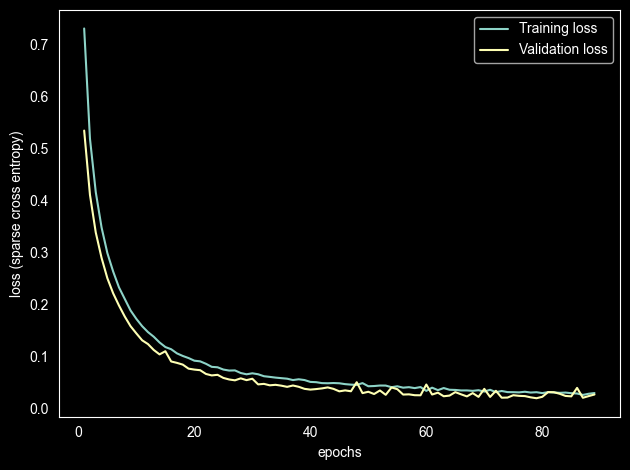

In [110]:
loss_mse = history.history['loss']
val_loss_mse = history.history['val_loss']
plt.ylabel('loss (sparse cross entropy)')
plt.xlabel('epochs')
plt.plot(range(1, len(loss_mse)+1), loss_mse)
plt.plot(range(1, len(val_loss_mse)+1), val_loss_mse)
plt.grid(False)
plt.legend(['Training loss', 'Validation loss'])
plt.tight_layout()

---
# Aufgabe 3 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1 und 2.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Nutzen Sie dieses Mal
die Methode der L2-Regularisierung ohne Callbacks, um eine Überanpassung zu vermeiden. (1P)

In [ ]:
# L2 regularization penalizes the model for large weights, ergo. discouraging overfitting
# does not necessarily push weights to zero
reg = l2(l2=0.001)

model = Sequential([
    Dense(60, input_shape=(5,), activation='relu', kernel_regularizer=reg),
    Dense(60, activation='relu', kernel_regularizer=reg),
    Dense(3, activation='softmax', kernel_regularizer=reg)
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess erneut, ähnlich wie unten, je nach
nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die Regularisierung zu vermeiden.
(1P)

<img src="images/3b.png" width="600">

In [112]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=50, verbose=2)

Epoch 1/200
15/15 - 1s - 43ms/step - accuracy: 0.7992 - loss: 0.8032 - val_accuracy: 0.8478 - val_loss: 0.6136
Epoch 2/200
15/15 - 0s - 5ms/step - accuracy: 0.8060 - loss: 0.5920 - val_accuracy: 0.8478 - val_loss: 0.4902
Epoch 3/200
15/15 - 0s - 5ms/step - accuracy: 0.8279 - loss: 0.4937 - val_accuracy: 0.8967 - val_loss: 0.4184
Epoch 4/200
15/15 - 0s - 5ms/step - accuracy: 0.8852 - loss: 0.4245 - val_accuracy: 0.9022 - val_loss: 0.3675
Epoch 5/200
15/15 - 0s - 5ms/step - accuracy: 0.8962 - loss: 0.3733 - val_accuracy: 0.9076 - val_loss: 0.3279
Epoch 6/200
15/15 - 0s - 5ms/step - accuracy: 0.9098 - loss: 0.3336 - val_accuracy: 0.9076 - val_loss: 0.2942
Epoch 7/200
15/15 - 0s - 5ms/step - accuracy: 0.9112 - loss: 0.3023 - val_accuracy: 0.9185 - val_loss: 0.2701
Epoch 8/200
15/15 - 0s - 5ms/step - accuracy: 0.9112 - loss: 0.2784 - val_accuracy: 0.9076 - val_loss: 0.2487
Epoch 9/200
15/15 - 0s - 5ms/step - accuracy: 0.9344 - loss: 0.2583 - val_accuracy: 0.9239 - val_loss: 0.2282
Epoch 10/

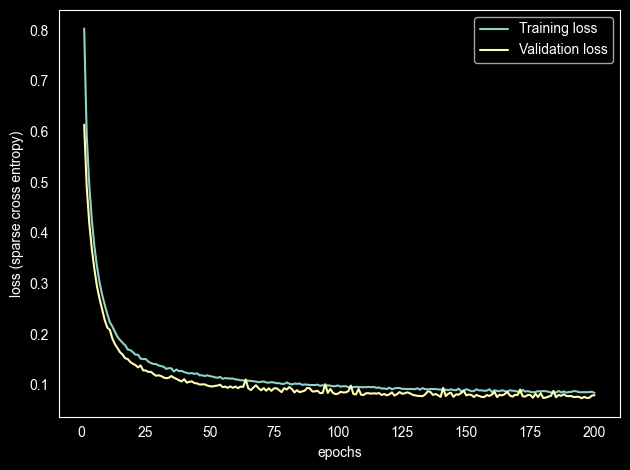

In [113]:
loss_mse = history.history['loss']
val_loss_mse = history.history['val_loss']
plt.ylabel('loss (sparse cross entropy)')
plt.xlabel('epochs')
plt.plot(range(1, len(loss_mse)+1), loss_mse)
plt.plot(range(1, len(val_loss_mse)+1), val_loss_mse)
plt.grid(False)
plt.legend(['Training loss', 'Validation loss'])
plt.tight_layout()